In [28]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [36]:
import matplotlib.pyplot as plt

*** 데이터 준비 ***

In [29]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [30]:
train_scaled = train_input / 255
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled,
    train_target,
    test_size = 0.2,
    random_state = 42
)
print(
    train_scaled.shape,
    train_target.shape,
    val_scaled.shape,
    val_target.shape
)

(48000, 28, 28) (48000,) (12000, 28, 28) (12000,)


*** 모델 준비 ***

In [31]:
def model_fn(a_layer = None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape = (28, 28)))
  model.add(keras.layers.Dense(100, activation = "relu"))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation = "softmax"))
  return model

In [32]:
model = model_fn()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = "accuracy")
history = model.fit(train_scaled, train_target, epochs = 5, verbose = 0)

In [34]:
model.evaluate(val_scaled, val_target)
print(history.history.keys())

375/375 [==============================] - 1s 2ms/step - loss: 0.3546 - accuracy: 0.8703
dict_keys(['loss', 'accuracy'])


In [35]:
print(history.history['loss'])
print(history.history['accuracy'])

[0.5244242548942566, 0.39459875226020813, 0.3512560725212097, 0.3262759745121002, 0.3038397431373596]
[0.8173750042915344, 0.8586458563804626, 0.8739166855812073, 0.8806041479110718, 0.8893749713897705]


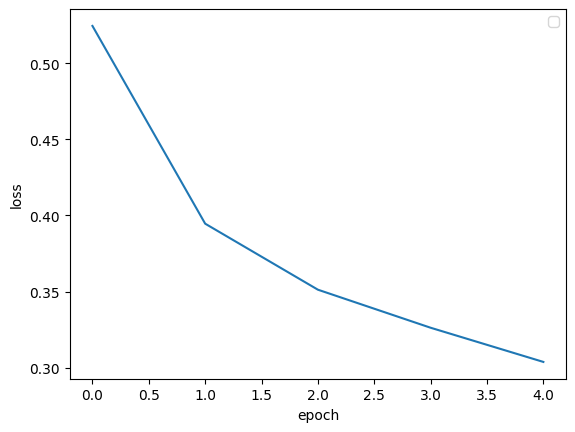

In [42]:
plt.plot(history.history['loss'])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

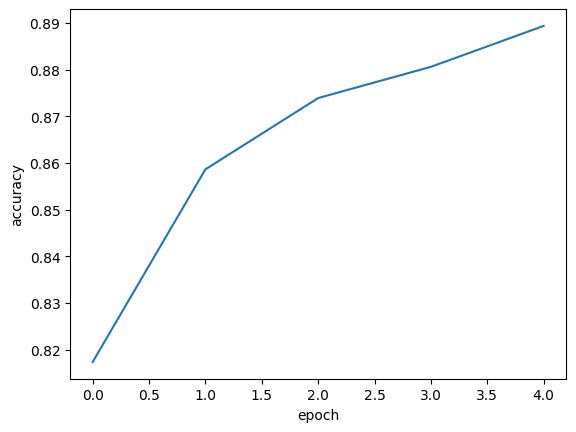

In [43]:
plt.plot(history.history["accuracy"])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

## 더 많은 에포크

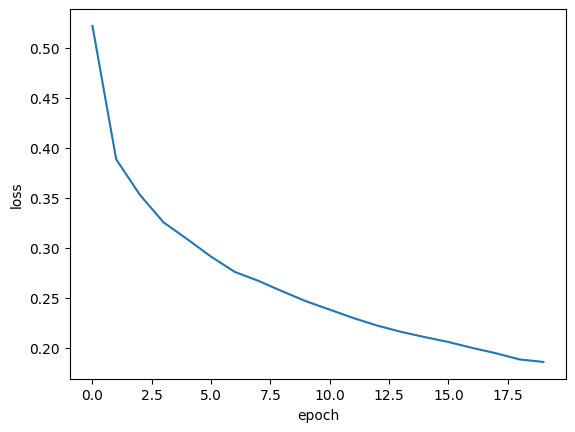

In [44]:
model = model_fn()
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = "accuracy")
his = model.fit(train_scaled, train_target, epochs = 20, verbose = 0)

plt.plot(his.history['loss'])
plt.xlabel('epoch')
plt.ylabel("loss")
plt.show()

## 검증 손실
**과소/과대 적합 확인**

In [49]:
model = model_fn()
model.compile(loss = "sparse_categorical_crossentropy", metrics="accuracy")
his = model.fit(train_scaled, train_target, verbose = 1, epochs = 20, validation_data=(val_scaled, val_target))


Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5318 - accuracy: 0.8125 - val_loss: 0.4191 - val_accuracy: 0.8497
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3950 - accuracy: 0.8575 - val_loss: 0.3821 - val_accuracy: 0.8642
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3553 - accuracy: 0.8705 - val_loss: 0.3600 - val_accuracy: 0.8749
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3346 - accuracy: 0.8785 - val_loss: 0.3577 - val_accuracy: 0.8797
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3165 - accuracy: 0.8863 - val_loss: 0.3676 - val_accuracy: 0.8781
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3039 - accuracy: 0.8916 - val_loss: 0.3518 - val_accuracy: 0.8802
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2951 - accuracy: 0.8946 - val_loss: 0.3619 - val_accuracy:

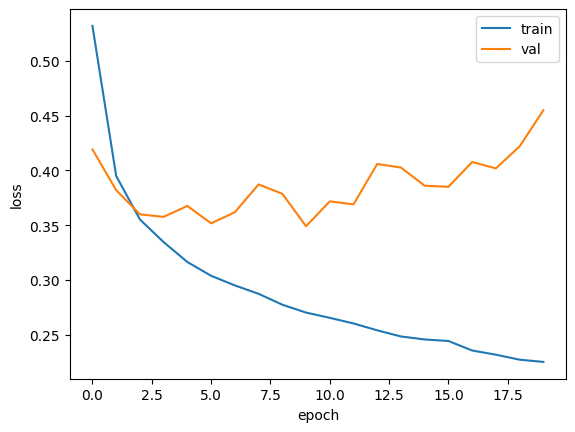

In [50]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

In [51]:
model = model_fn()
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics="accuracy")
his = model.fit(train_scaled, train_target, verbose = 1, epochs = 20, validation_data=(val_scaled, val_target))

print(his.history.keys())

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5174 - accuracy: 0.8199 - val_loss: 0.4361 - val_accuracy: 0.8449
Epoch 2/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3868 - accuracy: 0.8607 - val_loss: 0.3661 - val_accuracy: 0.8706
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3500 - accuracy: 0.8735 - val_loss: 0.3512 - val_accuracy: 0.8729
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3233 - accuracy: 0.8815 - val_loss: 0.3316 - val_accuracy: 0.8797
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3036 - accuracy: 0.8901 - val_loss: 0.3515 - val_accuracy: 0.8752
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2883 - accuracy: 0.8932 - val_loss: 0.3260 - val_accuracy: 0.8839
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2755 - accuracy: 0.8977 - val_loss: 0.3363 - val_accuracy:

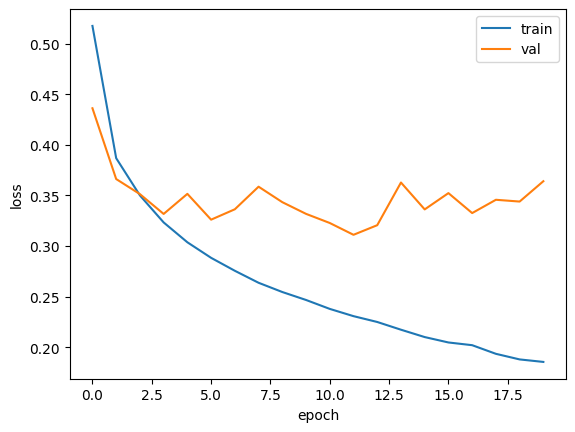

In [52]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

# 드롭 아웃
* 과대 적합 방지
* 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 끔 (출력 0)
* 드롭아웃 할 뉴런 개수

In [53]:
model = model_fn(keras.layers.Dropout(0.3)) # 30%
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_21 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = "accuracy")
his = model.fit(train_scaled, train_target, verbose = 1, epochs = 20, validation_data = (val_scaled, val_target))

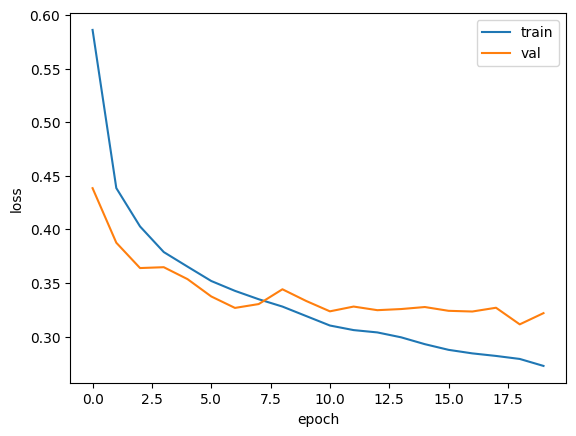

In [55]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(['train', 'val'])
plt.show()

**모델 저장**

In [56]:
model.save_weights("model-weights.h5")
model.save("model-whole.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [58]:
!ls -la *.h5

-rw-r--r-- 1 root root 333144 Apr 15 06:39 model-weights.h5
-rw-r--r-- 1 root root 981080 Apr 15 06:39 model-whole.h5
